<a href="https://colab.research.google.com/github/DanMontHell/Python-Masterschool-Project/blob/main/Car_Dataset_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and loading data

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Masterschool/car_data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


#Reviewing the data

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)
pd.set_option('display.max_colwidth', 30)

df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-...","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [6]:
#Tidying column headers
df.rename(columns={'Driven_Wheels': 'Driven Wheels', 'highway MPG': 'Highway MPG', 'city mpg':'City MPG'}, inplace=True)

print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'Highway MPG', 'City MPG', 'Popularity', 'MSRP'], dtype='object')


In [7]:
#Checking shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  Highway MPG        11914 non-null  int64  
 13  City MPG           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

##Data Cleaning

##Handling missing data

In [8]:
#Identifying null values
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven Wheels,0
Number of Doors,6
Market Category,3742


###Engine Fuel Type (3 nulls)

In [9]:
#Checking values, counts and mode
df['Engine Fuel Type'].value_counts()

,count
Engine Fuel Type,
regular unleaded,7172
premium unleaded (required),2009
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,66
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6


In [10]:
#Checking null values for trends
print(df[df['Engine Fuel Type'].isnull()])

         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven Wheels  Number of Doors Market Category Vehicle Size Vehicle Style  Highway MPG  City MPG  Popularity   MSRP
11321  Suzuki  Verona  2004              NaN      155.0               6.0         AUTOMATIC  front wheel drive              4.0             NaN      Midsize         Sedan           25        17         481  17199
11322  Suzuki  Verona  2004              NaN      155.0               6.0         AUTOMATIC  front wheel drive              4.0             NaN      Midsize         Sedan           25        17         481  20199
11323  Suzuki  Verona  2004              NaN      155.0               6.0         AUTOMATIC  front wheel drive              4.0             NaN      Midsize         Sedan           25        17         481  18499


In [11]:
#Checking other Suzuki values
Suzuki = df[df['Make'] == 'Suzuki']
Suzuki['Engine Fuel Type'].value_counts()

,count
Engine Fuel Type,
regular unleaded,348


####Action: fill NaN with 'regular unleaded'

All nulls correspond to the same *Make == Suzuki*. All *Suzuki* vehicles have *Engine Fuel Type == regular unleaded*.

In [72]:
#Replacing nulls with 'regular unleaded'
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna('regular unleaded')
df['Engine Fuel Type'].isnull().sum()

0

###Engine HP (69 nulls)

In [13]:
#Checking values, counts and mode
df['Engine HP'].value_counts()

,count
Engine HP,
200.0,456
170.0,351
210.0,320
240.0,268
285.0,246
...,...
660.0,1
661.0,1
573.0,1


In [14]:
#Checking mid points and variance
df['Engine HP'].describe()

,Engine HP
count,11845.00000
mean,249.38607
std,109.19187
min,55.00000
25%,170.00000
50%,227.00000
75%,300.00000
max,1001.00000


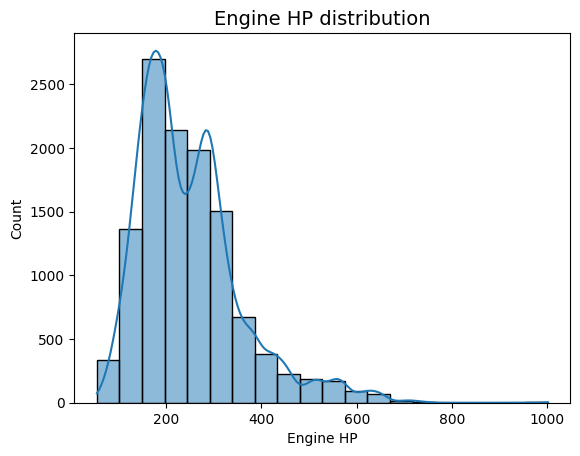

In [15]:
#Checking distribution
sns.histplot(df, x = 'Engine HP', bins=20, kde=True)
plt.title('Engine HP distribution', fontsize=14)
plt.show()

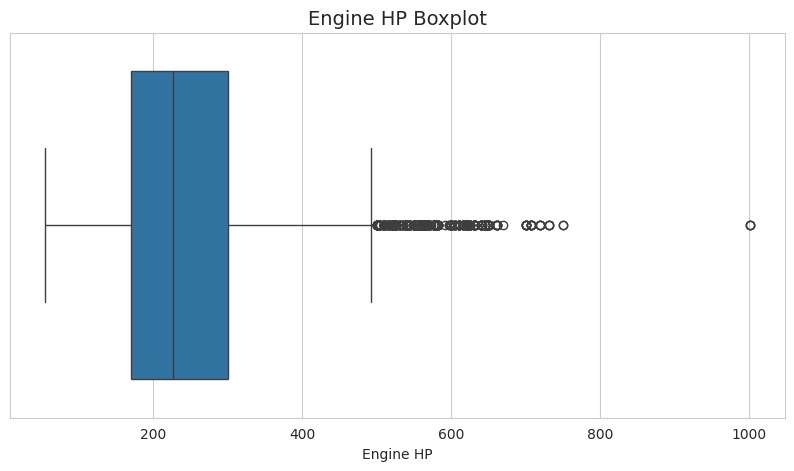

In [16]:
#Checking outliers
sns.set_style("whitegrid")
sns.color_palette("coolwarm")

plt.figure(figsize=[10, 5])

sns.boxplot(df, x = 'Engine HP')
plt.title('Engine HP Boxplot', fontsize=14)
plt.show()

In [17]:
#Looking for trends across null values
print(df[df['Engine HP'].isnull()])

         Make        Model  Year               Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven Wheels  Number of Doors Market Category Vehicle Size  Vehicle Style  Highway MPG  City MPG  Popularity   MSRP
539      FIAT         500e  2015                       electric        NaN               0.0      DIRECT_DRIVE  front wheel drive              2.0       Hatchback      Compact  2dr Hatchback          108       122         819  31800
540      FIAT         500e  2016                       electric        NaN               0.0      DIRECT_DRIVE  front wheel drive              2.0       Hatchback      Compact  2dr Hatchback          103       121         819  31800
541      FIAT         500e  2017                       electric        NaN               0.0      DIRECT_DRIVE  front wheel drive              2.0       Hatchback      Compact  2dr Hatchback          103       121         819  31800
2905  Lincoln  Continental  2017  premium unleaded (recommen...     

In [18]:
#Counting 'Make' occurances across nulls values
hp_null = df[df['Engine HP'].isnull()]
print(hp_null['Make'].value_counts())

Make
Tesla            18
Ford             13
Nissan           10
Lincoln           8
Chevrolet         6
Kia               5
FIAT              3
Honda             2
Toyota            2
Mitsubishi        1
Mercedes-Benz     1
Name: count, dtype: int64


In [19]:
#Calculating % of 'Make' occurances between null subset and main df
make_count = df['Make'].value_counts()
make_count_null = hp_null['Make'].value_counts()
aligned_count = make_count_null.reindex(make_count.index, fill_value=0)
perc = (aligned_count / make_count) * 100
print(perc.sort_values(ascending=False).round(2))

Make
Tesla            100.00
Lincoln            4.88
FIAT               4.84
Kia                2.16
Nissan             1.79
Ford               1.48
Chevrolet          0.53
Mitsubishi         0.47
Honda              0.45
Mercedes-Benz      0.28
Toyota             0.27
Scion              0.00
Aston Martin       0.00
Plymouth           0.00
Bentley            0.00
Ferrari            0.00
Rolls-Royce        0.00
Maserati           0.00
Lamborghini        0.00
Porsche            0.00
Lotus              0.00
HUMMER             0.00
Maybach            0.00
Alfa Romeo         0.00
McLaren            0.00
Spyker             0.00
Genesis            0.00
Saab               0.00
Pontiac            0.00
Land Rover         0.00
Infiniti           0.00
Volkswagen         0.00
Dodge              0.00
GMC                0.00
Mazda              0.00
Cadillac           0.00
Suzuki             0.00
BMW                0.00
Audi               0.00
Oldsmobile         0.00
Hyundai            0.00
Volvo      

In [20]:
#Exploring Make == Tesla for trends
tesla = df[df['Make'] == 'Tesla']
print(tesla)

       Make    Model  Year Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type     Driven Wheels  Number of Doors          Market Category Vehicle Size Vehicle Style  Highway MPG  City MPG  Popularity    MSRP
6921  Tesla  Model S  2014         electric        NaN               0.0      DIRECT_DRIVE  rear wheel drive              4.0  Exotic,High-Performance        Large         Sedan           90        88        1391   79900
6922  Tesla  Model S  2014         electric        NaN               0.0      DIRECT_DRIVE  rear wheel drive              4.0       Exotic,Performance        Large         Sedan           97        94        1391   69900
6923  Tesla  Model S  2014         electric        NaN               0.0      DIRECT_DRIVE   all wheel drive              4.0  Exotic,High-Performance        Large         Sedan           94        86        1391  104500
6924  Tesla  Model S  2014         electric        NaN               0.0      DIRECT_DRIVE  rear wheel drive        

In [21]:
#Checking for variance among other electric vehicles
electric = df[df["Engine Fuel Type"] == "electric"]
print(electric['Engine HP'].describe())

count     22.000000
mean     145.318182
std       36.470975
min       66.000000
25%      121.250000
50%      140.000000
75%      170.000000
max      200.000000
Name: Engine HP, dtype: float64


In [22]:
#Checking for variance among other performance vehicles
performance = df[df["Market Category"].isin(["Performance"])]
print(performance['Engine HP'].describe())

count    601.000000
mean     234.901830
std       56.044019
min      135.000000
25%      200.000000
50%      219.000000
75%      268.000000
max      435.000000
Name: Engine HP, dtype: float64


####Action: Imputate Median for Tesla vehicles, else drop rows
There is significant variance across the data. Dropping all null values is not an option because that would eliminate all existences of *Tesla* from the df.

I will use the Median of the *Marketing Category isin 'performance'* (219) as a representative value for all Tesla occurances which is also close to overall Mode (200) and Median (227).

I will drop all other nulls because the variance is too high and they represent an insignificant proportion of the data.

In [23]:
df.loc[(df['Engine HP'].isna()) & (df['Make'] == 'Tesla'), 'Engine HP'] = 219

In [24]:
df.dropna(subset=['Engine HP'], inplace=True)

###Engine Cylinders (30 nulls)

In [25]:
#Checking values, counts and mode
df['Engine Cylinders'].value_counts()

,count
Engine Cylinders,
4.0,4743
6.0,4473
8.0,2031
12.0,230
5.0,225
10.0,68
0.0,31
3.0,30
16.0,3


In [26]:
#Checking mid points and variance
df['Engine Cylinders'].describe()

,Engine Cylinders
count,11834.000000
mean,5.641457
std,1.764790
min,0.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,16.000000


In [27]:
#Reviewing null values for trends
ec_null = df[df['Engine Cylinders'].isnull()]
print(ec_null)

            Make    Model  Year             Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven Wheels  Number of Doors            Market Category Vehicle Size  Vehicle Style  Highway MPG  City MPG  Popularity   MSRP
1983   Chevrolet  Bolt EV  2017                     electric      200.0               NaN      DIRECT_DRIVE  front wheel drive              4.0                  Hatchback      Compact  4dr Hatchback          110       128        1385  40905
1984   Chevrolet  Bolt EV  2017                     electric      200.0               NaN      DIRECT_DRIVE  front wheel drive              4.0                  Hatchback      Compact  4dr Hatchback          110       128        1385  36620
3716  Volkswagen   e-Golf  2015                     electric      115.0               NaN      DIRECT_DRIVE  front wheel drive              4.0                  Hatchback      Compact  4dr Hatchback          105       126         873  33450
3717  Volkswagen   e-Golf  2015     

Observation: Nulls are either 'Engine Fuel Type' == 'electric' or 'Make' == 'Mazda'

In [28]:
#Reviewing (predefined) electric subset
pd.crosstab(electric['Engine Fuel Type'], electric['Engine Cylinders'])

Engine Cylinders,0.0
Engine Fuel Type,
electric,56


Observation: All 'electric' vehicles have 0 'Engine Cylinders'

In [29]:
#Looking for trends among 'Make' == 'Mazda'
mazda = df[df['Make'] == 'Mazda']
mazda['Engine Cylinders'].describe()

,Engine Cylinders
count,403.000000
mean,4.615385
std,0.924224
min,4.000000
25%,4.000000
50%,4.000000
75%,6.000000
max,6.000000


In [30]:
mazda['Engine Cylinders'].mode()

,Engine Cylinders
0,4.0


####Action: If 'electric' then 0 else 4
Null values fall under two categories; 'Engine Fuel Type' == 'electric' or 'Make' == 'Mazda'.

All electric vehicles have 0 'Engine Cylinders'.

The Median and Mode value for 'Mazda' vehicles is 4. (The Mean is not an option because this value should be an integer.)

In [31]:
df.loc[(df["Engine Cylinders"].isna()) & (df["Engine Fuel Type"] == "electric"), "Engine Cylinders"] = 0
df.loc[(df["Engine Cylinders"].isna()) & (df["Engine Fuel Type"] != "electric"), "Engine Cylinders"] = 4

###Number of Doors (6 nulls)

In [32]:
#Checking for values. counts and mode
df['Number of Doors'].value_counts()

,count
Number of Doors,
4.0,8305
2.0,3157
3.0,395


In [33]:
#Reviewing common traits among nulls
door_null = df[df['Number of Doors'].isnull()]
print(door_null)

         Make    Model  Year             Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type     Driven Wheels  Number of Doors          Market Category Vehicle Size Vehicle Style  Highway MPG  City MPG  Popularity    MSRP
4666  Ferrari       FF  2013  premium unleaded (required)      651.0              12.0  AUTOMATED_MANUAL   all wheel drive              NaN  Exotic,High-Performance        Large         Coupe           16        11        2774  295000
6930    Tesla  Model S  2016                     electric      219.0               0.0      DIRECT_DRIVE   all wheel drive              NaN       Exotic,Performance        Large         Sedan          105       102        1391   79500
6931    Tesla  Model S  2016                     electric      219.0               0.0      DIRECT_DRIVE   all wheel drive              NaN       Exotic,Performance        Large         Sedan          101        98        1391   66000
6932    Tesla  Model S  2016                     electric   

Observation: All nulls are either 'Ferrari FF' or 'Tesla Model S'

In [34]:
#Reviewing (predefined) tesla subset for door values
tesla['Number of Doors'].value_counts()

,count
Number of Doors,
4.0,13


Observation: All other 'Tesla' vehicles have 4 doors

In [35]:
ferrari = df[(df["Make"] == "Ferrari")]
ferrari["Number of Doors"].value_counts()

,count
Number of Doors,
2.0,68


Observation: All 'Ferrari' vehicles have 2 doors

####Action: Imputate Mode value for each 'Make'

Null values correspond to either 'Make' == 'Tesla' or 'Make' == 'Ferrari.
All 'Tesla' vehicles have 4 doors. All Ferrari vehicles have 2 doors.

In [36]:
df.loc[(df["Number of Doors"].isna()) & (df["Make"] == "Tesla"), "Number of Doors"] = 4
df.loc[(df["Number of Doors"].isna()) & (df["Make"] == "Ferrari"), "Number of Doors"] = 2

###Market Category (3742 nulls)

In [37]:
#Checking values, counts and mode
print(df["Market Category"].value_counts())

Market Category
Crossover                                          1104
Flex Fuel                                           872
Luxury                                              851
Luxury,Performance                                  673
Hatchback                                           622
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64


Observation: There are 71 unique values

In [38]:
#Creating a subset to explore the nulls
mc_null = df[df["Market Category"].isnull()]
print(mc_null)

         Make     Model  Year               Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type      Driven Wheels  Number of Doors Market Category Vehicle Size Vehicle Style  Highway MPG  City MPG  Popularity   MSRP
87     Nissan     200SX  1996               regular unleaded      115.0               4.0            MANUAL  front wheel drive              2.0             NaN      Compact         Coupe           36        26        2009   2000
88     Nissan     200SX  1996               regular unleaded      115.0               4.0            MANUAL  front wheel drive              2.0             NaN      Compact         Coupe           36        26        2009   2000
91     Nissan     200SX  1997               regular unleaded      115.0               4.0            MANUAL  front wheel drive              2.0             NaN      Compact         Coupe           35        25        2009   2000
92     Nissan     200SX  1997               regular unleaded      115.0             

In [39]:
#Looking for trends across aggregations
mc_null.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,2006.679443,194.961136,5.370946,3.472795,25.604932,18.837577,1670.430984,19930.954972
std,8.738817,69.030672,1.376031,0.847641,6.747687,4.846534,1488.522173,13365.616275
min,1990.000000,66.000000,3.000000,2.000000,12.000000,10.000000,26.000000,2000.000000
25%,1999.000000,150.000000,4.000000,3.000000,20.000000,15.000000,549.000000,3089.000000
50%,2008.000000,180.000000,6.000000,4.000000,24.000000,18.000000,1385.000000,21665.000000
75%,2015.000000,230.000000,6.000000,4.000000,30.000000,22.000000,2031.000000,27794.500000
max,2017.000000,450.000000,8.000000,4.000000,42.000000,35.000000,5657.000000,68996.000000


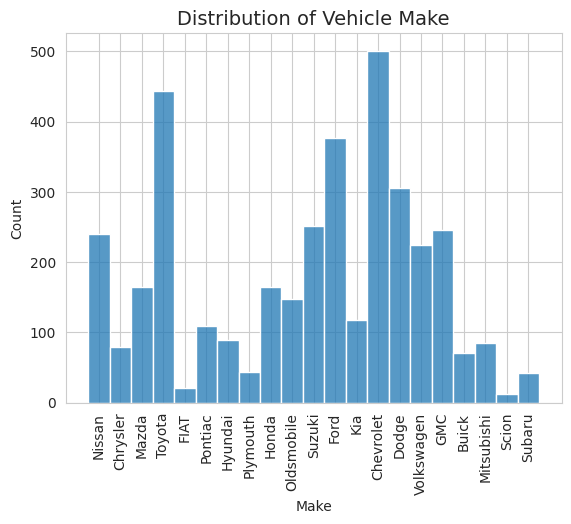

In [40]:
#Looking for trends in 'Make'
sns.histplot(mc_null, x = 'Make')
plt.title('Distribution of Vehicle Make', fontsize=14)
plt.xticks(rotation=90)
plt.show()

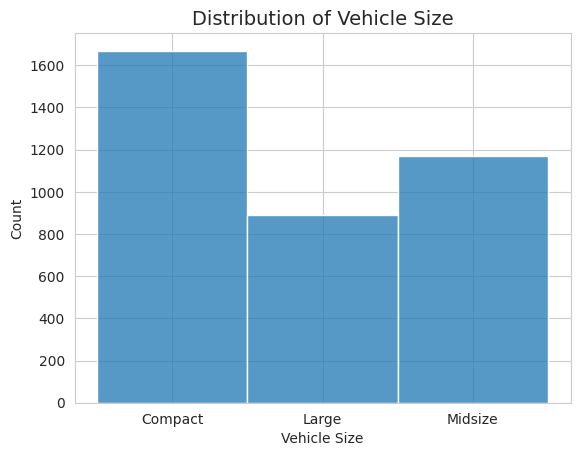

In [41]:
sns.histplot(mc_null, x = 'Vehicle Size')
plt.title('Distribution of Vehicle Size', fontsize=14)
plt.show()

####Action: Fill NaN with 'Unknown'

With over 71 different values for this column and no obvious trend I will rename all null values as "Unknown" as assigning to the mode will skew the data.

In [42]:
df["Market Category"] = df["Market Category"].fillna("Unknown")

###Null count

In [43]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven Wheels,0
Number of Doors,0
Market Category,0


In [44]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
count,11863.000000,11863.000000,11863.000000,11863.000000,11863.000000,11863.000000,11863.000000,1.186300e+04
mean,2010.366855,249.339965,5.634410,3.434291,26.480654,19.511253,1551.227093,4.061503e+04
std,7.587579,109.115403,1.770737,0.882134,8.223266,7.674812,1437.810679,6.023423e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.998500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.229500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


###Casting data types

In [45]:
#Reformatting data types
df['Engine HP'] = df['Engine HP'].astype(int)
df['Engine Cylinders'] = df['Engine Cylinders'].astype(int)
df['Number of Doors'] = df['Number of Doors'].astype(int)
df['MSRP'] = df['MSRP'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11863 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11863 non-null  object 
 1   Model              11863 non-null  object 
 2   Year               11863 non-null  int64  
 3   Engine Fuel Type   11863 non-null  object 
 4   Engine HP          11863 non-null  int64  
 5   Engine Cylinders   11863 non-null  int64  
 6   Transmission Type  11863 non-null  object 
 7   Driven Wheels      11863 non-null  object 
 8   Number of Doors    11863 non-null  int64  
 9   Market Category    11863 non-null  object 
 10  Vehicle Size       11863 non-null  object 
 11  Vehicle Style      11863 non-null  object 
 12  Highway MPG        11863 non-null  int64  
 13  City MPG           11863 non-null  int64  
 14  Popularity         11863 non-null  int64  
 15  MSRP               11863 non-null  float64
dtypes: float64(1), int64(7), ob

###String Operations

In [46]:
#Standardize string values to lowercase
df['Make'] = df['Make'].str.lower()
df['Model'] = df['Model'].str.lower()
df['Engine Fuel Type'] = df['Engine Fuel Type'].str.lower()
df['Transmission Type'] = df['Transmission Type'].str.lower()
df['Driven Wheels'] = df['Driven Wheels'].str.lower()
df['Market Category'] = df['Market Category'].str.lower()
df['Vehicle Size'] = df['Vehicle Size'].str.lower()
df['Vehicle Style'] = df['Vehicle Style'].str.lower()

In [47]:
#Checking for misspells
df['Make'].value_counts().sort_values()

,count
Make,
bugatti,3
genesis,3
spyker,3
mclaren,5
alfa romeo,5
maybach,16
hummer,17
tesla,18
lotus,29


In [48]:
df['Engine Fuel Type'].value_counts()

,count
Engine Fuel Type,
regular unleaded,7161
premium unleaded (required),2009
premium unleaded (recommended),1519
flex-fuel (unleaded/e85),899
diesel,153
flex-fuel (premium unleaded required/e85),54
electric,40
flex-fuel (premium unleaded recommended/e85),26
natural gas,2


In [49]:
df['Transmission Type'].value_counts()

,count
Transmission Type,
automatic,8241
manual,2935
automated_manual,626
direct_drive,42
unknown,19


In [50]:
#Removing underscores
df['Transmission Type'] = df['Transmission Type'].str.replace('_', ' ', regex=True)
df['Transmission Type'].value_counts()

,count
Transmission Type,
automatic,8241
manual,2935
automated manual,626
direct drive,42
unknown,19


In [51]:
df['Driven Wheels'].value_counts()

,count
Driven Wheels,
front wheel drive,4742
rear wheel drive,3370
all wheel drive,2348
four wheel drive,1403


In [52]:
df['Vehicle Size'].value_counts()

,count
Vehicle Size,
compact,4736
midsize,4360
large,2767


In [53]:
df['Vehicle Style'].value_counts().sort_values()

,count
Vehicle Style,
convertible suv,29
cargo minivan,70
cargo van,95
passenger van,128
2dr suv,138
regular cab pickup,392
passenger minivan,412
2dr hatchback,503
wagon,587


###Feature Engineering

In [54]:
#Creating a column for total MPG
df["Total MPG"] = df[["City MPG", "Highway MPG"]].mean(axis=1)

In [55]:
#Creating a column for price per hp
df["Price per HP"] = (df["MSRP"] / df["Engine HP"]).round(2)

In [56]:
df.head(20)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
0,bmw,1 series m,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"factory tuner,luxury,high-...",compact,coupe,26,19,3916,46135.0,22.5,137.72
1,bmw,1 series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,28,19,3916,40650.0,23.5,135.50
2,bmw,1 series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,high-performance",compact,coupe,28,20,3916,36350.0,24.0,121.17
3,bmw,1 series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,"luxury,performance",compact,coupe,28,18,3916,29450.0,23.0,128.04
4,bmw,1 series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,28,18,3916,34500.0,23.0,150.00
5,bmw,1 series,2012,premium unleaded (required),230,6,manual,rear wheel drive,2,"luxury,performance",compact,coupe,28,18,3916,31200.0,23.0,135.65
6,bmw,1 series,2012,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,26,17,3916,44100.0,21.5,147.00
7,bmw,1 series,2012,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,high-performance",compact,coupe,28,20,3916,39300.0,24.0,131.00
8,bmw,1 series,2012,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,28,18,3916,36900.0,23.0,160.43
9,bmw,1 series,2013,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,27,18,3916,37200.0,22.5,161.74


#Exploratory Data Analysis (EDA)

##Descriptive Statistics

In [57]:
df.describe().round(2)

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
count,11863.00,11863.00,11863.00,11863.00,11863.00,11863.00,11863.00,11863.00,11863.00,11863.00
mean,2010.37,249.34,5.63,3.43,26.48,19.51,1551.23,40615.03,23.00,140.65
std,7.59,109.12,1.77,0.88,8.22,7.67,1437.81,60234.23,7.69,100.21
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00,9.50,7.14
25%,2007.00,170.00,4.00,2.00,22.00,16.00,549.00,20995.00,18.50,110.27
50%,2015.00,227.00,6.00,4.00,26.00,18.00,1385.00,29985.00,22.00,134.13
75%,2016.00,300.00,6.00,4.00,30.00,22.00,2009.00,42295.00,26.00,161.64
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00,189.00,2307.69


Observation: MSRP mid points vary significantly (Mean = 40615, Median = 29985).

Max MPG (City and Highway) stand out as potential errors in the data or demonstrate exceptional vehicle performance.

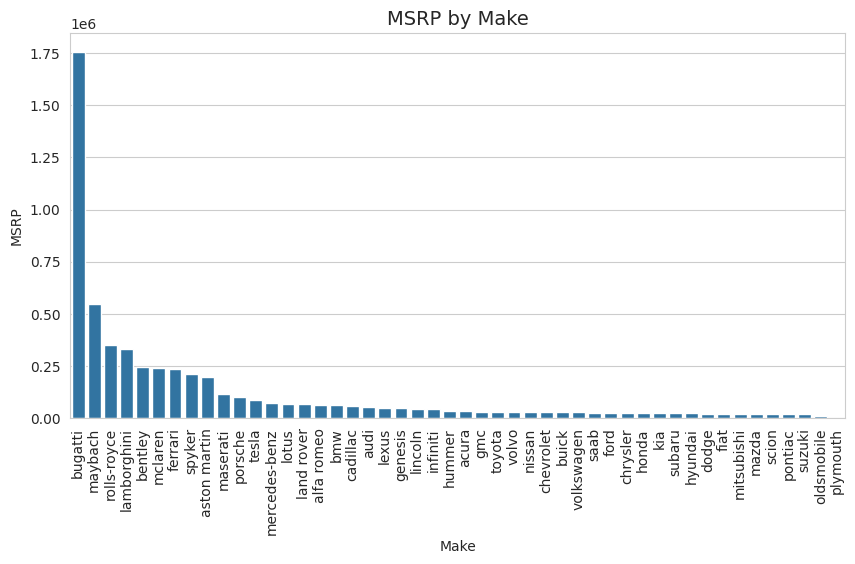

In [58]:
#Looking for outliers in MSRP
sorted_make = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=[10,5])
sns.barplot(sorted_make, x = 'Make', y = 'MSRP')
plt.title('MSRP by Make', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [59]:
#Checking bugatti for inconsistencies
bugatti = df[df['Make'] == 'bugatti']
bugatti['MSRP'].describe().round(2)

,MSRP
count,3.00
mean,1757223.67
std,286438.40
min,1500000.00
25%,1602884.50
50%,1705769.00
75%,1885835.50
max,2065902.00




```
# This is formatted as code
```

Observation: 'Make' == 'bugatti' is skewing the data with its high price point.

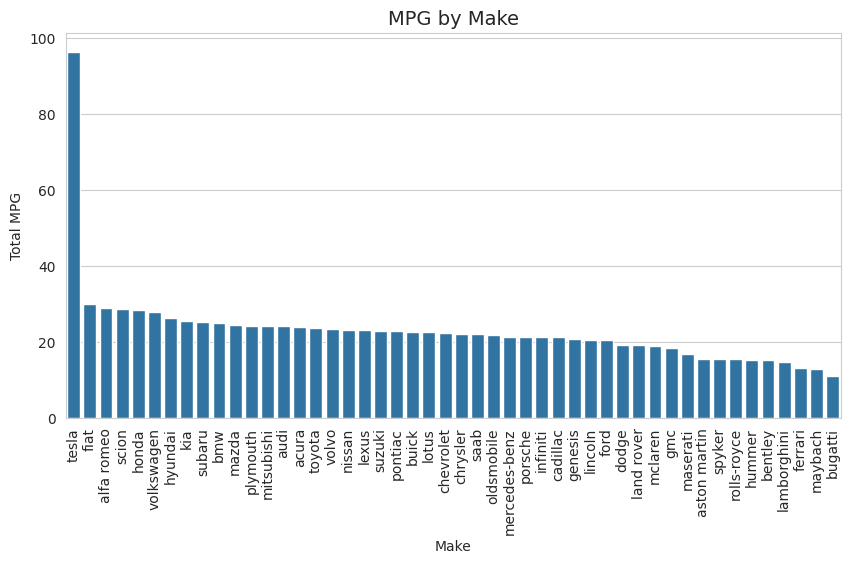

In [60]:
#Looking for outliers in MSRP
sorted_make_mpg = df.groupby('Make')['Total MPG'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=[10,5])
sns.barplot(sorted_make_mpg, x = 'Make', y = 'Total MPG')
plt.title('MPG by Make', fontsize=14)
plt.xticks(rotation=90)
plt.show()

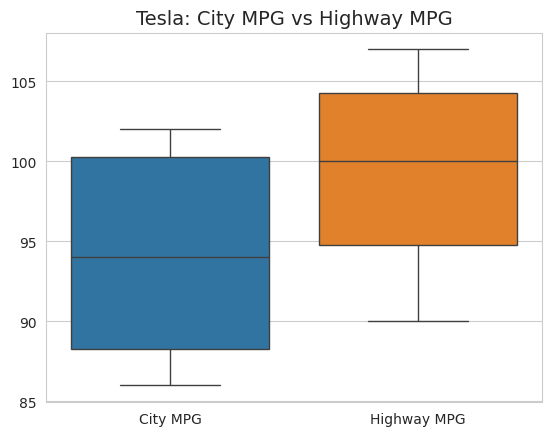

In [61]:
#Checking Tesla for inconsistencies in MPG
sns.boxplot(tesla[['City MPG', 'Highway MPG']])
plt.title('Tesla: City MPG vs Highway MPG', fontsize=14)
plt.show()

Observation: Tesla skewing the data but there are no outliers or inconsistencies within the 'Make' == 'Tesla' indicating that the data is true to performance of the vehicle.

##Group Analysis

In [62]:
df.groupby("Driven Wheels")[["MSRP", "Popularity"]].mean().round(2)

,MSRP,Popularity
Driven Wheels,,
all wheel drive,58721.63,1517.04
four wheel drive,35312.04,1742.98
front wheel drive,22942.73,1384.34
rear wheel drive,55074.35,1730.05


Observation: 'Driven Wheel' == 'rear wheel drive' is the most *popular* and *most expensive* vehicle type.

In [63]:
df.groupby("Vehicle Size")[["MSRP", "Popularity"]].mean().round(2)

,MSRP,Popularity
Vehicle Size,,
compact,34290.80,1459.95
large,53914.38,1881.04
midsize,39044.45,1441.06


Observation: 'Vehicle Size' == 'large' has a higher price point *(MSRP)* and a greater *Popularity*

In [64]:
df.groupby("Engine Cylinders")[["MSRP", "Popularity"]].mean().round(2)

,MSRP,Popularity
Engine Cylinders,,
0,57251.38,1500.70
3,9698.00,741.30
4,23790.12,1418.13
5,20818.85,965.75
6,34199.74,1663.72
8,61487.01,1766.28
10,184123.82,1830.03
12,285177.80,835.07
16,1757223.67,820.00


Observation: 'MSRP' generally trends upwards as *Engine Cylinders* increase. *electric* cars are an exception as they have 0 engine cylinders. *Popularity* is spread but 10 engine cylinders is the most popular.

##Visualisations

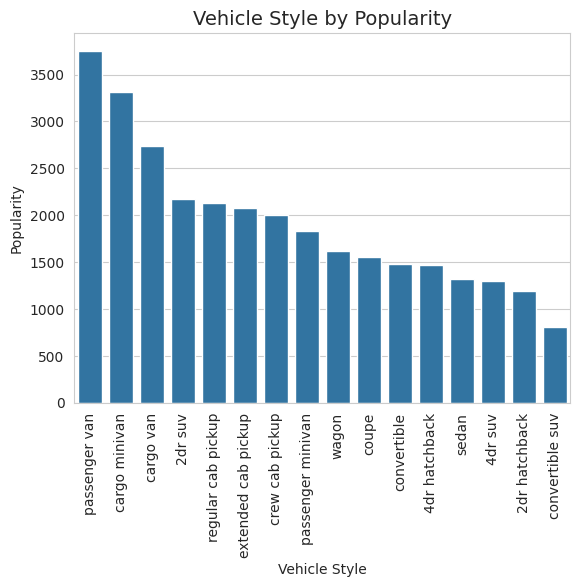

In [65]:
sorted_style_pop = df.groupby('Vehicle Style')['Popularity'].mean().sort_values(ascending=False).reset_index()

sns.barplot(sorted_style_pop, x = 'Vehicle Style', y = 'Popularity')
plt.title("Vehicle Style by Popularity", fontsize=14)
plt.xlabel("Vehicle Style")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.show()

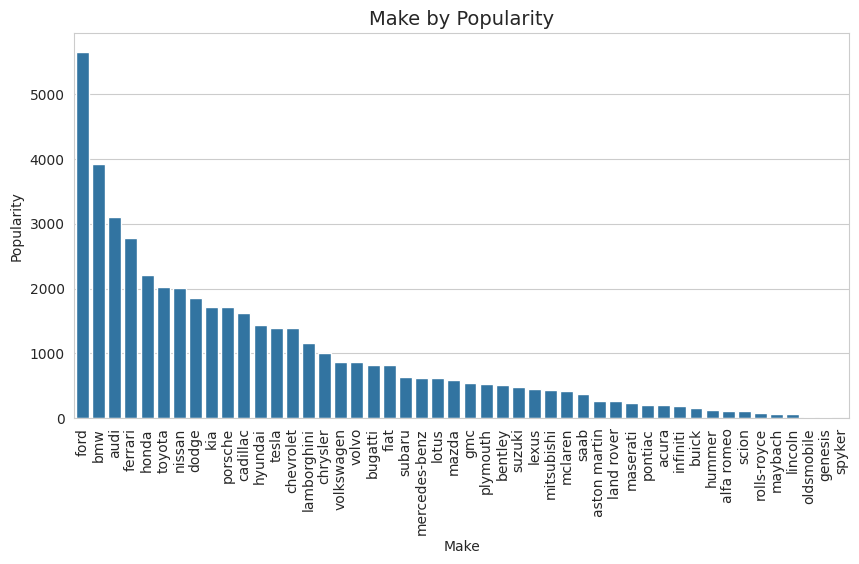

In [66]:
sorted_make_pop = df.groupby('Make')['Popularity'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=[10,5])
sns.barplot(sorted_make_pop, x = 'Make', y = 'Popularity')
plt.title("Make by Popularity", fontsize=14)
plt.xlabel("Make")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.show()

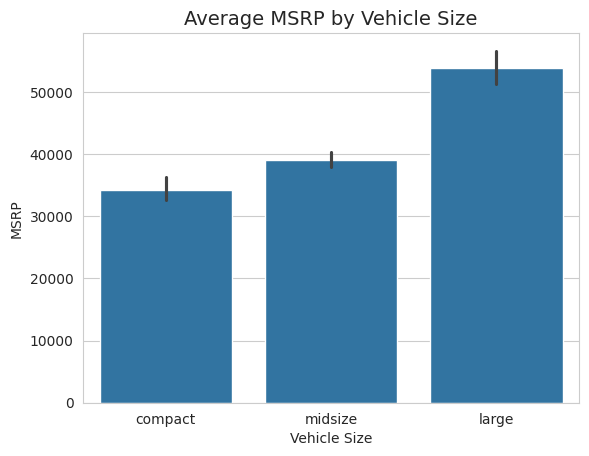

In [67]:
sns.barplot(df, x="Vehicle Size", y = "MSRP")
plt.title("Average MSRP by Vehicle Size", fontsize=14)
plt.xlabel("Vehicle Size")
plt.ylabel("MSRP")
plt.show()

Observation: As the *Vehicle Size* increases so does the average *MSRP*. There is a larger increase from *Midsize* to *Large* than from *Compact* to *Midsize*.
The STD is smaller for the *Midsize* than other Vehicle Sizes.

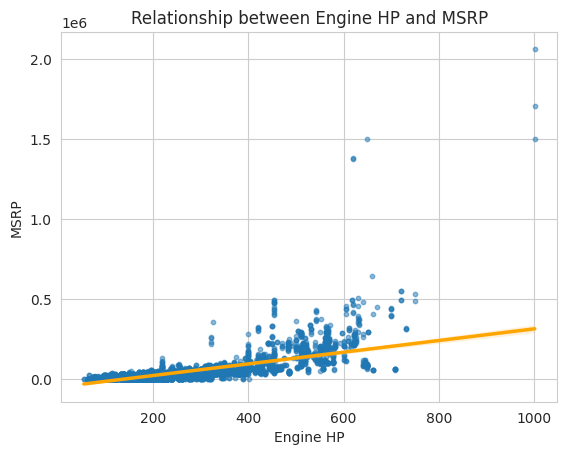

In [68]:
sns.regplot(df, x = "Engine HP", y = "MSRP", line_kws={"linewidth": 2.5, "color": "orange"}, scatter_kws={"s": 10, "alpha": 0.5})
plt.title("Relationship between Engine HP and MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.show()

Observation: The smaller Engine HP (200-400) tend to have a similar MSRP. As the Engine HP increases there is a greater increase in MSRP variance. The extreme outliers ('Make' == 'bugatti') exist from 600HP upwards.

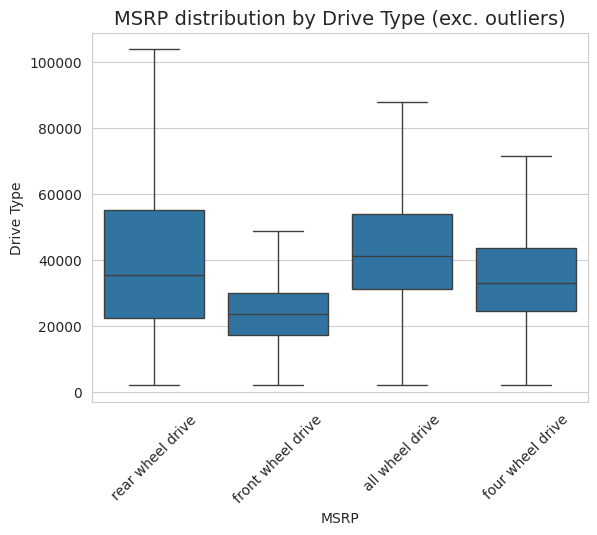

In [69]:
sns.boxplot(df, x = "Driven Wheels", y = "MSRP", showfliers=False)
plt.title("MSRP distribution by Drive Type (exc. outliers)", fontsize=14)
plt.xlabel("MSRP")
plt.ylabel("Drive Type")
plt.xticks(rotation=45)
plt.show()

Observation: Exclusive of outliers, MSRP has the largest variance in the *'Drive Type' == 'rear wheel drive'*. *'all wheel drive'* is the most expensive according to the Median. *'front wheel drive'* is the cheapest with the lowest variance in MSRP.

In [70]:
numerical_df = ["Engine HP", "MSRP", "Popularity", "City MPG", "Highway MPG"]
corr_df = df[numerical_df].corr()
print(corr_df)

             Engine HP      MSRP  Popularity  City MPG  Highway MPG
Engine HP     1.000000  0.661336    0.037545 -0.410508    -0.385351
MSRP          0.661336  1.000000   -0.047943 -0.181521    -0.170572
Popularity    0.037545 -0.047943    1.000000 -0.014352    -0.030158
City MPG     -0.410508 -0.181521   -0.014352  1.000000     0.874046
Highway MPG  -0.385351 -0.170572   -0.030158  0.874046     1.000000


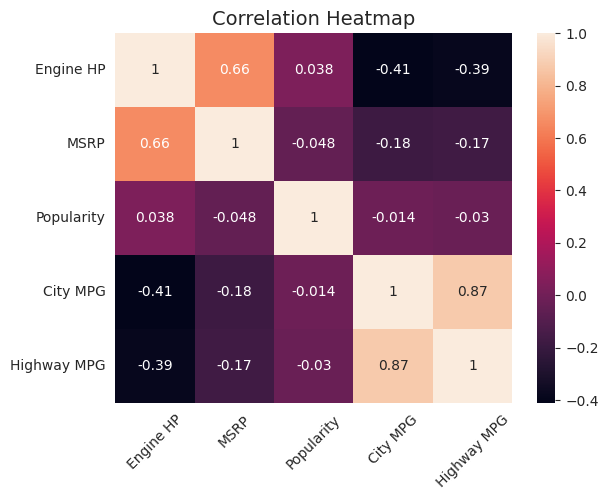

In [71]:
sns.heatmap(corr_df, annot=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Observation: There is a strong correlation (0.87) between *'Highway MPG'* and *'City MPG'* indicating that these Vehicles are equally efficient in both instances.
Additionally there is a strong correlation (0.65) between *'MSRP'* and *'Engine HP'* suggesting the more powerful the Vehicle the greater the price.

#Executive Summary

The dataset reveals significant variability in vehicle pricing, driven primarily by factors such as engine performance, vehicle size, and brand influence. High-end brands like Bugatti and Tesla skew the data, though Tesla’s figures align with its performance standards. Trends show that rear-wheel drive vehicles are both the most popular and among the most expensive, while engine specifications like horsepower and cylinders strongly influence price. Additionally, there’s a high correlation between city and highway fuel efficiency, indicating consistent vehicle performance across driving conditions.